In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import tensorflow.keras.layers as tfl
import tensorflow.keras as keras
from keras.layers import BatchNormalization, Conv2D, Dropout, MaxPooling2D, Dense, Flatten
import tensorflow.keras.optimizers as opt
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
import sklearn.model_selection as sk
ph = tf.config.list_physical_devices('GPU')
tf.config.experimental.get_memory_growth(ph[0])

In [33]:
BATCH_SIZE = 64
IMG_SIZE = (48,48)
directory = '../../datasets/Final/train'
datagen = ImageDataGenerator(
    rescale=1/.255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.3)

testgen = ImageDataGenerator(
        rescale=1/.255,
)

train_dataset = datagen.flow_from_directory(directory,
                                             #shuffle=True,
                                             color_mode='grayscale',
                                             batch_size=BATCH_SIZE,
                                             target_size=IMG_SIZE)
directory = '../../datasets/Final/test'

validation_dataset = testgen.flow_from_directory(directory,
                                                #shuffle=True,
                                                color_mode='grayscale',
                                                batch_size=BATCH_SIZE,
                                                target_size=IMG_SIZE)
                                    


Found 66396 images belonging to 7 classes.
Found 22133 images belonging to 7 classes.


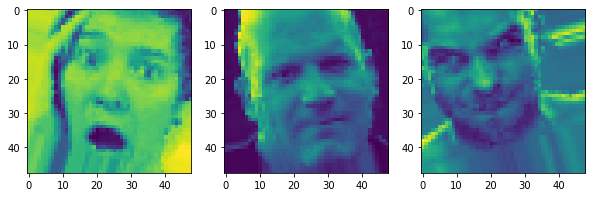

In [32]:
pic = train_dataset
plt.figure(figsize=(10,8))
#Plots our figures
for i in range(1,4):
  plt.subplot(1, 3, i)
  batch = pic.next()
  images = batch[0]
  image_ = (images[0])
  plt.imshow(image_)
plt.show()

In [10]:
input_shape=(48,48,1)
input_layer = tfl.Input(input_shape)
conv1 = tfl.Conv2D(filters=4,kernel_size=(3,3))(input_layer)
batch1 = tfl.BatchNormalization()(conv1)
r1 = tfl.ReLU()(batch1)
conv2 = tfl.Conv2D(filters=4,kernel_size=(3,3))(r1)
batch2 = tfl.BatchNormalization()(conv2)
block1 = tfl.ReLU()(batch2)


sepconv1 = tfl.SeparableConv2D(filters=8,kernel_size=(3,3), padding='same')(block1)
batch3 = tfl.BatchNormalization()(sepconv1)
r2 = tfl.ReLU()(batch3)
sepconv2 = tfl.SeparableConv2D(filters=8,kernel_size=(3,3), padding='same')(r2)
batch4 = tfl.BatchNormalization()(sepconv2)
r3 = tfl.ReLU()(batch4)
pool1 = tfl.MaxPool2D(pool_size=(3,3), strides=(2,2), padding='same')(r3)

conv3 = tfl.Conv2D(filters=8, kernel_size=(1,1),strides=(2,2))(block1)
batch5 = tfl.BatchNormalization()(conv3)
block2 = tfl.add([pool1,batch5])

sepconv3 = tfl.SeparableConv2D(filters=16,kernel_size=(3,3), padding='same')(block2)
batch6 = tfl.BatchNormalization()(sepconv3)
r4 = tfl.ReLU()(batch6)
sepconv4 = tfl.SeparableConv2D(filters=16,kernel_size=(3,3), padding='same')(r4)
batch7 = tfl.BatchNormalization()(sepconv4)
r5 = tfl.ReLU()(batch7)
pool2 = tfl.MaxPool2D(pool_size=(3,3), strides=(2,2), padding='same')(r5)


conv4 = tfl.Conv2D(filters=16, kernel_size=(1,1),strides=(2,2))(block2)
batch8 = tfl.BatchNormalization()(conv4)
block3 = tfl.add([pool2,batch8])

conv5 = tfl.Conv2D(filters=32,kernel_size=(3,3),padding='same')(block3)
conv6 = tfl.Conv2D(filters=64,kernel_size=(3,3),padding='same')(conv5)
conv7 = tfl.Conv2D(filters=128,kernel_size=(3,3),padding='same')(conv6)

pool3 = tfl.MaxPool2D(pool_size=(3,3), strides=(2,2), padding='same')(conv7)
pool4 = tfl.MaxPool2D(pool_size=(3,3), strides=(2,2), padding='same')(pool3)
pool6 = tfl.MaxPool2D(pool_size=(3,3), strides=(2,2), padding='same')(pool4)

flat = tfl.Flatten()(pool6)
fc1 = tfl.Dense(1024,activation='relu')(flat)
d1 = tfl.Dropout(0.4)(fc1)
fc2 = tfl.Dense(512,activation='relu')(d1)
d5 = tfl.Dropout(0.4)(fc2)
output = tfl.Dense(7,activation='softmax')(d5)

model = tf.keras.Model(inputs=input_layer, outputs=output)

model.compile(optimizer=tf.keras.optimizers.Adam(0.00001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(
  train_dataset,
  epochs=20,
  validation_data = validation_dataset
)

Epoch 1/20
1038/1038 [==============================] - 431s 350ms/step - loss: 2.0968 - accuracy: 0.1965
Epoch 2/20
1038/1038 [==============================] - 32s 31ms/step - loss: 1.8965 - accuracy: 0.2266
Epoch 3/20
1038/1038 [==============================] - ETA: 0s - loss: 1.8741 - accuracy: 0.23 - 33s 32ms/step - loss: 1.8740 - accuracy: 0.2377
Epoch 4/20
1038/1038 [==============================] - 35s 33ms/step - loss: 1.8603 - accuracy: 0.2455
Epoch 5/20
1038/1038 [==============================] - 33s 31ms/step - loss: 1.8474 - accuracy: 0.2544
Epoch 6/20
1038/1038 [==============================] - 34s 32ms/step - loss: 1.8305 - accuracy: 0.2653
Epoch 7/20
1038/1038 [==============================] - 34s 32ms/step - loss: 1.8141 - accuracy: 0.2777
Epoch 8/20
1038/1038 [==============================] - 35s 33ms/step - loss: 1.7931 - accuracy: 0.2913
Epoch 9/20
1038/1038 [==============================] - 34s 33ms/step - loss: 1.7741 - accuracy: 0.3012
Epoch 10/20
1038/103

In [15]:
num_classes = 7
net = keras.Sequential(name='DCNN')

net.add(
    Conv2D(
        filters=64,
        kernel_size=(5,5),
        input_shape=(48, 48, 1),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_1'
    )
)
net.add(BatchNormalization(name='batchnorm_1'))
net.add(
    Conv2D(
        filters=64,
        kernel_size=(5,5),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_2'
    )
)
net.add(BatchNormalization(name='batchnorm_2'))

net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_1'))
net.add(Dropout(0.4, name='dropout_1'))

net.add(
    Conv2D(
        filters=128,
        kernel_size=(3,3),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_3'
    )
)
net.add(BatchNormalization(name='batchnorm_3'))
net.add(
    Conv2D(
        filters=128,
        kernel_size=(3,3),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_4'
    )
)
net.add(BatchNormalization(name='batchnorm_4'))

net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_2'))
net.add(Dropout(0.4, name='dropout_2'))

net.add(
    Conv2D(
        filters=256,
        kernel_size=(3,3),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_5'
    )
)
net.add(BatchNormalization(name='batchnorm_5'))
net.add(
    Conv2D(
        filters=256,
        kernel_size=(3,3),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_6'
    )
)
net.add(BatchNormalization(name='batchnorm_6'))

net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_3'))
net.add(Dropout(0.5, name='dropout_3'))


net.add(
    Conv2D(
        filters=512,
        kernel_size=(3,3),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_7'
    )
)
net.add(BatchNormalization(name='batchnorm_7'))
net.add(
    Conv2D(
        filters=512,
        kernel_size=(3,3),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_8'
    )
)
net.add(BatchNormalization(name='batchnorm_8'))

net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_4'))
net.add(Dropout(0.3, name='dropout_4'))

net.add(
    Conv2D(
        filters=512,
        kernel_size=(3,3),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_9'
    )
)
net.add(BatchNormalization(name='batchnorm_9'))
net.add(
    Conv2D(
        filters=512,
        kernel_size=(5,5),
        activation='elu',
        padding='same',
        kernel_initializer='he_normal',
        name='conv2d_10'
    )
)
net.add(BatchNormalization(name='batchnorm_10'))

net.add(MaxPooling2D(pool_size=(2,2), name='maxpool2d_5'))
net.add(Dropout(0.3, name='dropout_5'))

net.add(Flatten(name='flatten'))
    
net.add(
    Dense(
        512,
        activation='elu',
        kernel_initializer='he_normal',
        name='dense_1'
    )
)
net.add(BatchNormalization(name='batchnorm_11'))

net.add(Dropout(0.4, name='dropout_6'))


net.add(
    Dense(
        256,
        activation='elu',
        kernel_initializer='he_normal',
        name='dense_2'
    )
)

net.add(BatchNormalization(name='batchnorm_12'))

net.add(Dropout(0.4, name='dropout_7'))

net.add(
    Dense(
        num_classes,
        activation='softmax',
        name='out_layer'
    )
)

In [16]:
net.summary()

Model: "DCNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        1664      
_________________________________________________________________
batchnorm_1 (BatchNormalizat (None, 48, 48, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        102464    
_________________________________________________________________
batchnorm_2 (BatchNormalizat (None, 48, 48, 64)        256       
_________________________________________________________________
maxpool2d_1 (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       73856  

In [35]:
t_stpes = train_dataset.n//BATCH_SIZE
v_steps = validation_dataset.n//BATCH_SIZE
t_stpes, v_steps

(1037, 345)

In [48]:

net.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

his = net.fit(
  train_dataset,
  epochs=50,
  steps_per_epoch=t_stpes,
  validation_data=validation_dataset,
  validation_steps=v_steps,
  verbose=2
)

Epoch 1/50
1037/1037 - 240s - loss: 0.8660 - accuracy: 0.6798 - precision: 0.7789 - recall: 0.5731 - val_loss: 0.9645 - val_accuracy: 0.6488 - val_precision: 0.7392 - val_recall: 0.5599
Epoch 2/50
1037/1037 - 246s - loss: 0.8727 - accuracy: 0.6755 - precision: 0.7802 - recall: 0.5699 - val_loss: 0.9864 - val_accuracy: 0.6442 - val_precision: 0.7343 - val_recall: 0.5569
Epoch 3/50
1037/1037 - 246s - loss: 0.8720 - accuracy: 0.6778 - precision: 0.7807 - recall: 0.5696 - val_loss: 0.9835 - val_accuracy: 0.6447 - val_precision: 0.7354 - val_recall: 0.5523
Epoch 4/50
1037/1037 - 260s - loss: 0.8656 - accuracy: 0.6804 - precision: 0.7796 - recall: 0.5732 - val_loss: 1.0035 - val_accuracy: 0.6356 - val_precision: 0.7233 - val_recall: 0.5509
Epoch 5/50
1037/1037 - 257s - loss: 0.8698 - accuracy: 0.6781 - precision: 0.7790 - recall: 0.5733 - val_loss: 0.9788 - val_accuracy: 0.6406 - val_precision: 0.7381 - val_recall: 0.5441
Epoch 6/50
1037/1037 - 255s - loss: 0.8710 - accuracy: 0.6779 - precis

In [81]:
net = keras.models.load_model('net_model_2.h5')

346/346 [==============================] - 52s 150ms/step - loss: 1.0082 - accuracy: 0.6370 - precision: 0.7196 - recall: 0.5586


[1.0081572532653809,
 0.6369674205780029,
 0.7195902466773987,
 0.5586228966712952]

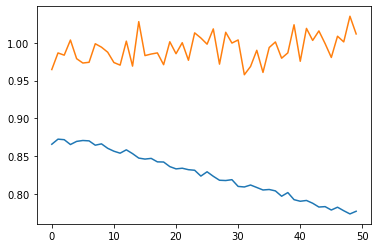

In [82]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])

net.evaluate(validation_dataset)

In [88]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array 
path = 'F:\\emotion_recognetion\\archive\\download (1).jfif'
img = load_img(path, color_mode='grayscale', target_size=(48,48))
img = img_to_array(img)
img = img/255

prediction = net.predict(np.expand_dims(img,0))
prediction = np.argmax(prediction)
prediction

5